# Segmentacion de Datos #

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración inicial
initial_material = 1000  # kg/h
residue_percentages = {"machine_1": 10, "machine_2": 5, "machine_3": 2}
segment_types = ["PET Clear", "PET Color", "HDPE Clear", "HDPE Color"]
segment_ratios = [0.25, 0.25, 0.25, 0.25]  # Proporciones de cada segmento
machines = ["Machine 1", "Machine 2", "Machine 3"]

# Función para calcular el material procesado y residuos
def calculate_segmented_output(material, residue_percentage, segment_ratios):
    residue = material * (residue_percentage / 100)
    processed = material - residue
    segments = [processed * ratio for ratio in segment_ratios]
    return processed, residue, segments

# Almacenar datos de cada máquina
outputs = []
residues = []
segments_per_machine = []

material = initial_material
for machine in machines:
    processed, residue, segments = calculate_segmented_output(
        material, residue_percentages[machine.lower().replace(" ", "_")], segment_ratios
    )
    outputs.append(processed)
    residues.append(residue)
    segments_per_machine.append(segments)
    material = processed

# Convertir segmentos a formato por tipo
segments_by_type = np.sum(segments_per_machine, axis=0)


Visualización Gráfica

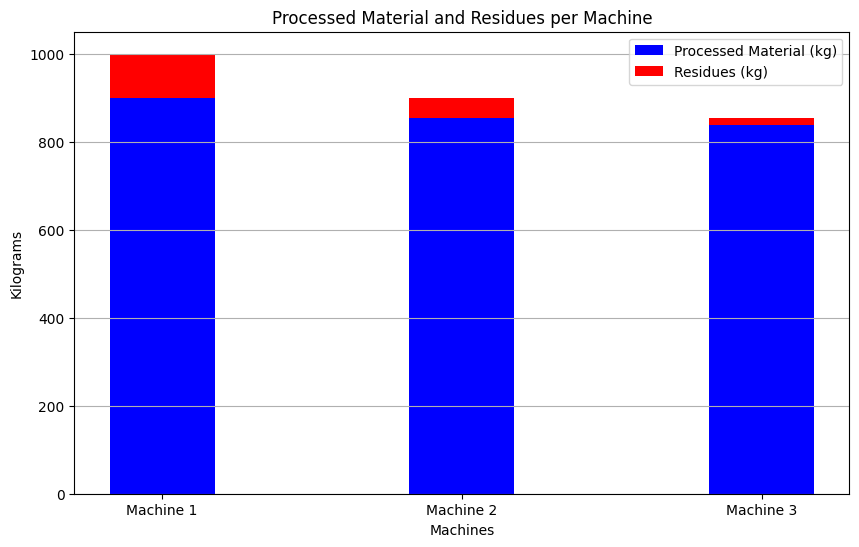

In [2]:
# Gráfico de barras por máquina
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(machines))

plt.bar(x, outputs, width=bar_width, label="Processed Material (kg)", color="blue")
plt.bar(x, residues, width=bar_width, bottom=outputs, label="Residues (kg)", color="red")

plt.title("Processed Material and Residues per Machine")
plt.xlabel("Machines")
plt.ylabel("Kilograms")
plt.xticks(x, machines)
plt.legend()
plt.grid(axis="y")
plt.show()


Gráfico de Sectores: Segmentación Final por Tipo

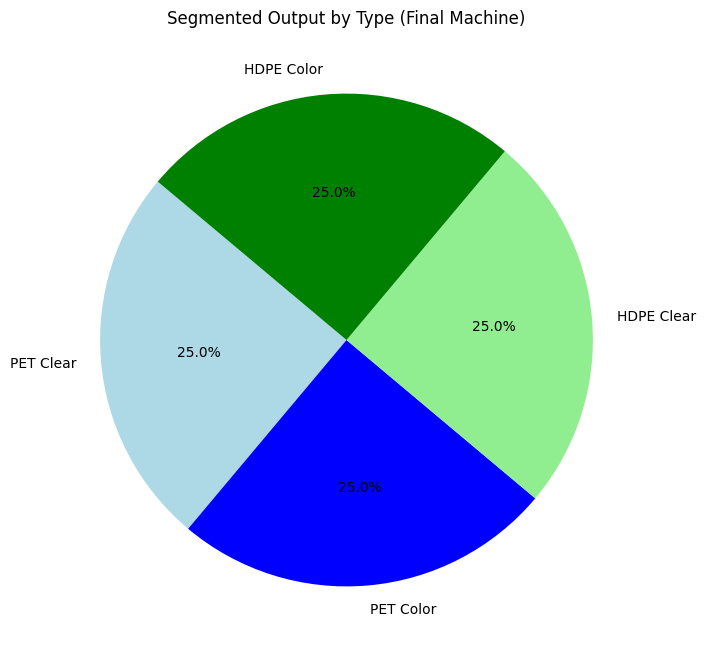

In [3]:
# Gráfico de sectores por tipo de segmento
plt.figure(figsize=(8, 8))
plt.pie(
    segments_by_type,
    labels=segment_types,
    autopct="%1.1f%%",
    startangle=140,
    colors=["lightblue", "blue", "lightgreen", "green"]
)
plt.title("Segmented Output by Type (Final Machine)")
plt.show()


Grafica: Evolución del Material por Maquina

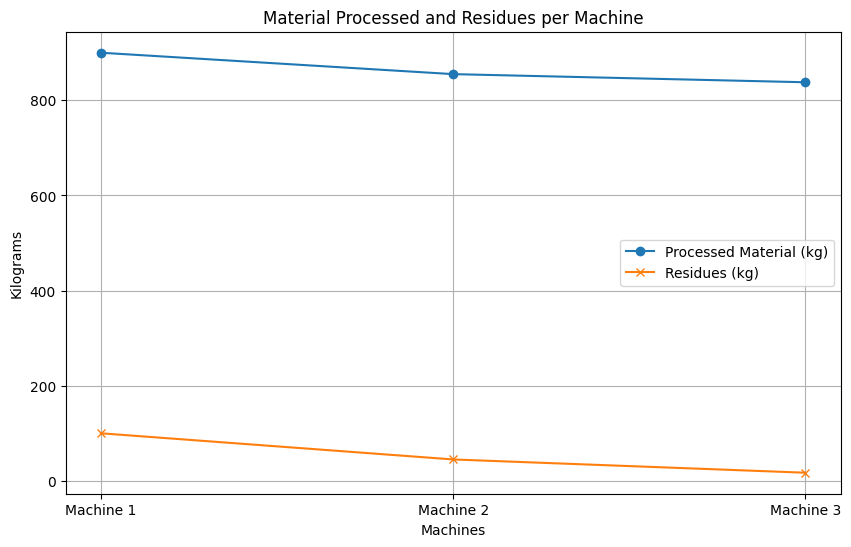

In [4]:
# Evolución del material procesado
plt.figure(figsize=(10, 6))
plt.plot(machines, outputs, marker="o", label="Processed Material (kg)")
plt.plot(machines, residues, marker="x", label="Residues (kg)")

plt.title("Material Processed and Residues per Machine")
plt.xlabel("Machines")
plt.ylabel("Kilograms")
plt.legend()
plt.grid()
plt.show()
